In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv").set_index('Y')
df

,0,0.5,1,1.5,2,2.5,3
Y,,,,,,,
5,3,18,2,3,0,0,0
25,2,1,10,5,0,0,0
40,0,0,0,7,0,0,0
55,0,0,0,0,10,0,0
70,0,0,0,0,1,10,0
100,0,0,0,0,0,0,35


In [3]:
def conditional_averages_yxi(df):
    yi = df.index
    return df.apply(lambda x: sum(yi * x) / sum(x), axis = 0)

y_avg = conditional_averages_yxi(df)

xi = np.array(y_avg.index).astype(float)
yi = np.array(y_avg.values).astype(float)

pd.DataFrame({'xi': xi, 'yi': yi})

,xi,yi
0,0.0,13.000000
1,0.5,6.052632
2,1.0,21.666667
3,1.5,28.000000
4,2.0,56.363636
5,2.5,70.000000
6,3.0,100.000000


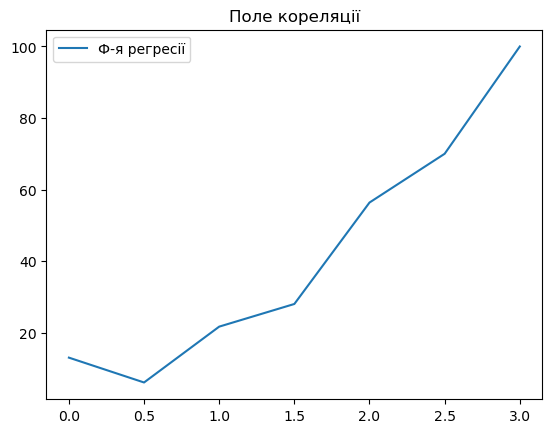

In [4]:
plt.plot(xi, yi, label = "Ф-я регресії")
plt.title("Поле кореляції")
plt.legend()
plt.show()

In [5]:
# Припускаємо, що кореляція - параболічна

In [6]:
ni = np.array(df.sum(axis = 0))

def calc_parabolic_coeffitients(xi, yi, ni):
    n_x4 = sum(n * (x**4) for n, x in zip(ni, xi))
    n_x3 = sum(n * (x**3) for n, x in zip(ni, xi))
    n_x2 = sum(n * (x**2) for n, x in zip(ni, xi))
    n_x = sum(n * x for n, x in zip(ni, xi))
    n = sum(ni)

    n_y_x2 = sum(n * y * (x**2) for n, x, y in zip(ni, xi, yi))
    n_y_x = sum(n * y * x for n, x, y in zip(ni, xi, yi))
    n_y = sum(n * y for n, y in zip(ni, yi))

    A = np.array([
        [n_x4, n_x3, n_x2, n_y_x2],
        [n_x3, n_x2, n_x, n_y_x],
        [n_x2, n_x, n, n_y]
    ], dtype = float)
    
    n = len(A)
    
    # Прямий хід
    for i in range(n):
        # Пошук максимального елемента у стовпці для уникнення нуля на діагоналі
        max_row = np.argmax(np.abs(A[i:n, i])) + i
        A[[i, max_row]] = A[[max_row, i]]
        
        # Пряме виключення
        for j in range(i+1, n):
            ratio = A[j, i] / A[i, i]
            A[j, i:] -= ratio * A[i, i:]
    
    # Зворотний хід
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (A[i, -1] - np.dot(A[i, i+1:n], x[i+1:n])) / A[i, i]
    
    return x


a, b, c = calc_parabolic_coeffitients(xi, yi, ni)

print(f"Рівняння параболічної кореляції: {a:.3f}x^2 + {b:.3f}x + {c:.3f}")

Рівняння параболічної кореляції: 9.624x^2 + 2.504x + 6.043


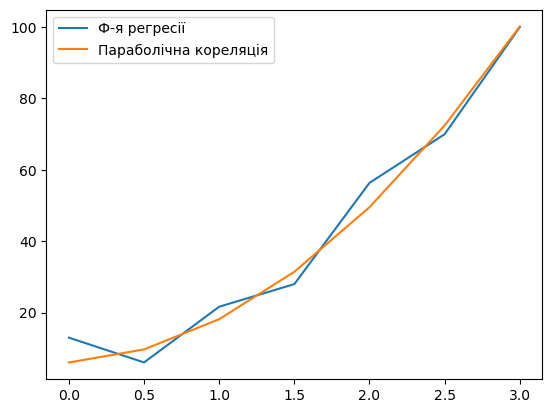

In [8]:
def f(x):
    return a * x**2 + b * x + c
    
y_f = f(xi)

plt.plot(xi, yi, label = "Ф-я регресії")
plt.plot(xi, y_f, label = "Параболічна кореляція")

plt.legend()

plt.show()

In [9]:
n_ij = np.array(df)

def dispersion(xi, yi, n_ij):
    n = sum(sum(n_ij[i]) for i in range(len(n_ij)))

    return sum([(yi[j] - f(xi[i])) ** 2 * n_ij[j][i] for j in range(len(yi)) for i in range(len(xi))]) / n

disp = dispersion(xi, np.array(df.index), n_ij)

In [10]:
def squared_deviations_sum(xi, yi, ni):
    return sum([(yi[i] - f(xi[i])) ** 2 * ni[i] for i in range(len(xi))])

devs = squared_deviations_sum(xi, yi, ni)

In [11]:
print(f"Значення дисперсії: ", disp)
print(f"Значення відхилення: ", devs)

Значення дисперсії:  53.85861214642205
Значення відхилення:  1392.7120100339841
